In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#excel dosyasını csv formatına dönüştürme ve veriyi yukleme
read_file = pd.read_excel ("mercedes.xlsx") 
read_file.to_csv ("mercedes.csv",  
                  index = None, 
                  header=True) 
data = pd.DataFrame(pd.read_csv("mercedes.csv")) 
data 

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


In [3]:
data.head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
6,2018,30948,Automatic,16000,145,47.9,2.1
7,2012,10948,Automatic,107000,265,36.7,3.5
8,2019,139948,Automatic,12000,145,21.4,4.0
9,2017,19750,Automatic,15258,30,64.2,2.1


In [4]:
data.tail()

,year,price,transmission,mileage,tax,mpg,engineSize
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0
13118,2019,54999,Automatic,2075,145,52.3,2.9


In [5]:
data.shape

(13119, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [7]:
data.columns

Index(['year', 'price', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=13119, step=1)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [10]:
data.isnull().values.any()

False

In [11]:
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
               n= Gösterilecek eşsiz değer sayısı
        Çıktı: Çubuk Grafiği
    """
    data_ =data[degisken]
    data_sayma = data_.value_counts()
    data_sayma = data_sayma[:n]
    plt.figure()
    plt.bar(data_sayma.index, data_sayma , color= "pink")
    plt.xticks(data_sayma.index, data_sayma.index.values)
    plt.xticks(rotation=40) #yazı eğikliği 
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, data_sayma))

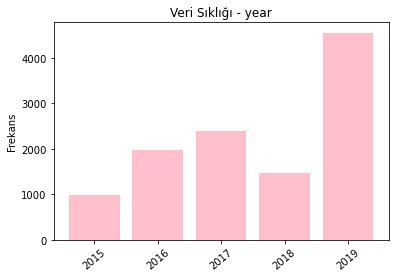

year: 
 2019    4553
2017    2381
2016    1971
2018    1467
2015     991
Name: year, dtype: int64


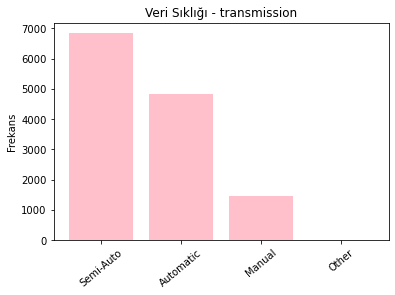

transmission: 
 Semi-Auto    6848
Automatic    4825
Manual       1444
Other           2
Name: transmission, dtype: int64


In [12]:
degisken = ["year", "transmission"]
for i in degisken:
    plotBar(i)

In [13]:
def plotHistogram(degisken):
    """
        Girdi: Değisken / sütun ismi
        Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(data[degisken], bins=75, color = "blue")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

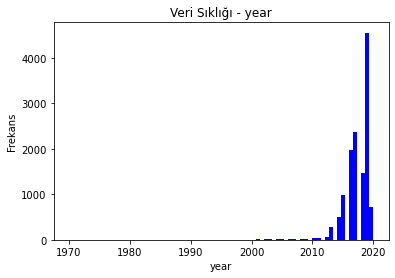

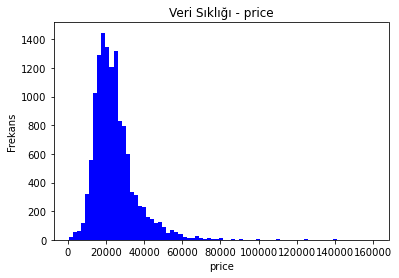

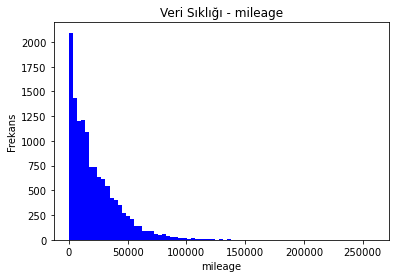

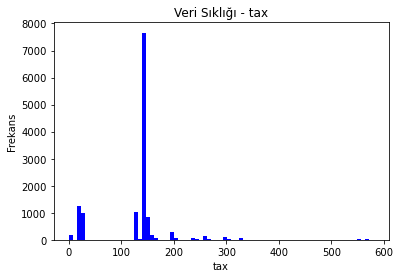

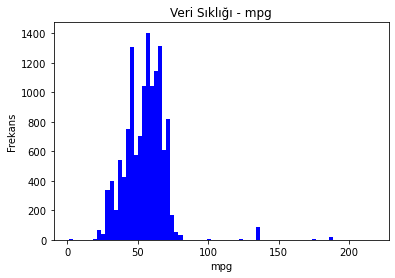

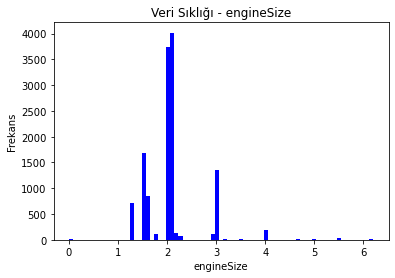

In [14]:
sayisal_degisken = ["year", "price", "mileage", "tax", "mpg", "engineSize"]
for i in sayisal_degisken:
    plotHistogram(i)

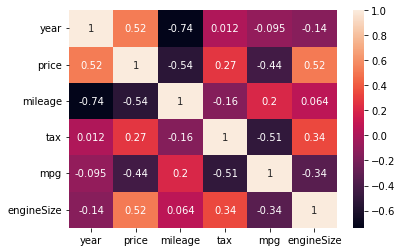

In [15]:
sns.heatmap(data.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show()

# Regresyonu Oluşturma

In [16]:
x=data[["mileage"]]
y=data[["price"]]

Text(0, 0.5, 'price')

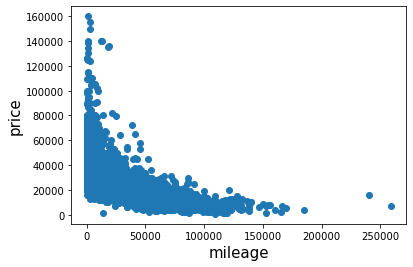

In [17]:
plt.scatter(x,y)
plt.xlabel("mileage", fontsize=15)
plt.ylabel("price", fontsize=15)

In [18]:
#normalizasyon -MinMax Scaller
data.mileage=(data.mileage - data.mileage.min())/(data.mileage.max()-data.mileage.min())
data.price=(data.price - data.price.min())/(data.price.max()-data.price.min())

In [19]:
x=data.mileage
y=data.price

In [20]:
y.values

array([0.02855368, 0.21523825, 0.30937125, ..., 0.19045617, 0.23432842,
       0.34106897])

In [21]:
x.values

array([0.24324032, 0.10424365, 0.02393446, ..., 0.04483029, 0.00936297,
       0.00800775])

Text(0.5, 1.0, 'mileage - price arası ilişki')

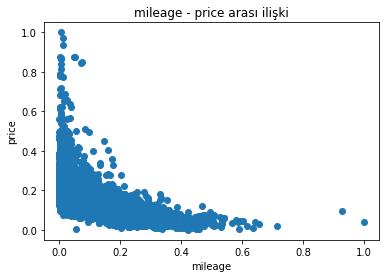

In [22]:
#x ve y arasındaki ilişki
plt.scatter(x.values, y.values)
plt.xlabel("mileage")
plt.ylabel("price")
plt.title("mileage - price arası ilişki")

In [23]:
#Model kurma
lr=LinearRegression()

In [24]:
lr.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))

LinearRegression()

In [25]:
lr.coef_, lr.intercept_

(array([[-0.48830544]]), array([0.19229864]))

In [26]:
print("Regresyon modeli mileage ={} + {} price".format(lr.intercept_[0].round(2), lr.coef_[0][0].round(2)))

Regresyon modeli mileage =0.19 + -0.49 price


In [27]:
y_predict= lr.predict(x.values.reshape(-1,1))

In [28]:
y_predict

array([[0.07352306],
       [0.1413959 ],
       [0.18061131],
       ...,
       [0.17040776],
       [0.18772665],
       [0.18838841]])

In [29]:
r2_score(y, y_predict)

0.2885990151375222

In [30]:
mean_squared_error(y, y_predict)

0.003929002757935016

In [31]:
mean_squared_error(y, y_predict,squared=False) #RMSE

0.06268175777636598

In [32]:
b0=lr.intercept_[0].round(2)
b1=lr.coef_[0][0].round(2)

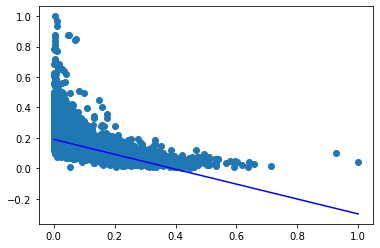

In [33]:
random_x=np.array([0,1])
plt.plot(random_x,b0 + b1*random_x, color='blue', label="regresyon")
plt.scatter(x.values,y.values)